<a href="https://colab.research.google.com/github/SeWonKwon/DeepLearning/blob/main/F01_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0(TensorFlow)_%EA%B8%B0%EC%B4%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 텐서플로우 (Tensorflow)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/TensorFlowLogo.svg/1200px-TensorFlowLogo.svg.png" width="300">

- 가장 널리 쓰이는 딥러닝 프레임워크 중 하나

- 구글이 주도적으로 개발하는 플랫폼

- 파이썬, C++ API를 기본적으로 제공하고,  
  자바스크립트(JavaScript), 자바(Java), 고(Go), 스위프트(Swift) 등 다양한 프로그래밍 언어를 지원

- tf.keras를 중심으로 고수준 API 통합 (2.x 버전)

- TPU(Tensor Processing Unit) 지원
  - TPU는 GPU보다 전력을 적게 소모, 경제적
  
  - 일반적으로 32비트(float32)로 수행되는 곱셈 연산을 16비트(float16)로 낮춤

## 텐서플로우 아키텍쳐

<img src="https://developers.google.com/machine-learning/crash-course/images/TFHierarchy.svg">

<sub>출처: https://developers.google.com/machine-learning/crash-course/first-steps-with-tensorflow/toolkit</sub>

[이수안컴퓨터연구소 유튜브 출처](https://www.youtube.com/watch?v=B961QM47g64&t=1389s)


## 텐서플로우 시작하기

In [ ]:
import numpy as np
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.4.1


### 텐서(Tensor)의 객체
- 타입(Type): `string`, `float32`, `float16`, `int32`, `int8` 등

- 형상(Shape): 0, 1, 2차원 등의 데이터 차원 

- 축(Rank): 차원의 개수

### 텐서의 차원과 연산

In [ ]:
a  = tf.constant(2) # default dtype int32
print(tf.rank(a)) # 0차원
print(a)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)


In [ ]:
b = tf.constant([2,3])
print(tf.rank(b)) # 1차원
print(b)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor([2 3], shape=(2,), dtype=int32)


In [ ]:
c = tf.constant([[2,3],[6,7]])
print(tf.rank(c))
print(c)

tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(
[[2 3]
 [6 7]], shape=(2, 2), dtype=int32)


In [ ]:
d = tf.constant(['Hello'])
print(tf.rank(d))
print(d)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor([b'Hello'], shape=(1,), dtype=string)


### 난수 생성

In [ ]:
rand = tf.random.uniform([1], 0, 1) # 동등한 확률 : uniform distribution
print(rand.shape)
print(tf.rank(rand))
print(rand)
rand

(1,)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor([0.8180095], shape=(1,), dtype=float32)


<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.8180095], dtype=float32)>

In [ ]:
rand2 = tf.random.normal([1,2], 0, 1) # 정규 분포 : normal distribution
print(rand2.shape)
print(rand2)

(1, 2)
tf.Tensor([[ 0.3033084  -0.01368132]], shape=(1, 2), dtype=float32)


In [ ]:
rand3 = tf.random.normal(shape=(3,2), mean=0, stddev=1)
print(rand3.shape)
rand3

(3, 2)


<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-1.4432796 , -0.13442995],
       [-0.97235787,  0.34016377],
       [ 1.616538  , -1.2032397 ]], dtype=float32)>

### 즉시 실행 모드 (Eager Mode) 지원
- 즉시 실행모드를 통해 텐서플로우를 파이썬처럼 사용할 수 있음

- 1.x 버전에서는 '그래프'를 생성하고, 초기화 한 뒤에 세션을 통해 **값을 흐르게 하는 작업**을 진행해야함


In [ ]:
a = tf.constant(3)
b = tf.constant(2)

In [ ]:
print(tf.add(a,b))
print(a+b)

tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)


In [ ]:
print(tf.subtract(a,b))
print(a-b)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)


In [ ]:
print(tf.multiply(a,b))
print(a*b)

tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)


### 텐서 플로우 ↔ 넘파이
- `numpy()`
- `tf.convet_to_tensor()`

In [ ]:
c = tf.add(a,b).numpy()
print(type(c))
c

<class 'numpy.int32'>


5

In [ ]:
c_square = np.square(c, dtype=np.float32)
c_tensor= tf.convert_to_tensor(c_square)
print(type(c_tensor))
print(c_tensor)

<class 'tensorflow.python.framework.ops.EagerTensor'>
tf.Tensor(25.0, shape=(), dtype=float32)


### 넘파이처럼 사용하기


In [ ]:
t = tf.constant([[1., 2., 3.],[4., 5., 6.]])
print(t.shape)
print(t.dtype)
t

(2, 3)
<dtype: 'float32'>


<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [ ]:
# numpy 처럼 slicing 역시 됩니다.
print(t[:,1:])

tf.Tensor(
[[2. 3.]
 [5. 6.]], shape=(2, 2), dtype=float32)


### newaxis

resize 와  비슷 개념이다. 

new axis (새로 추가될 axis) 를 적어주는 곳에 생겨 나게 된다.  인덱싱을하듯이사용하면 된다.

In [ ]:
t

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [ ]:
t[tf.newaxis,...] # t 와 비교해 보면 0번 axis에 1이 추가 된것을 볼수 있다. 

<tf.Tensor: shape=(1, 2, 3), dtype=float32, numpy=
array([[[1., 2., 3.],
        [4., 5., 6.]]], dtype=float32)>

In [ ]:
t[:,tf.newaxis,...] # 1번 axis에 1이 추가 된것을 볼수 있다. 

<tf.Tensor: shape=(2, 1, 3), dtype=float32, numpy=
array([[[1., 2., 3.]],

       [[4., 5., 6.]]], dtype=float32)>

In [ ]:
t[...,1] # 아래는 슬라이싱과 axis 추가 까지 같이 해준것이다.

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 5.], dtype=float32)>

In [ ]:
t[tf.newaxis,...,1]

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[2., 5.]], dtype=float32)>

In [ ]:
t[..., 1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

In [ ]:
t[..., 1, tf.newaxis, tf.newaxis]

<tf.Tensor: shape=(2, 1, 1), dtype=float32, numpy=
array([[[2.]],

       [[5.]]], dtype=float32)>

In [ ]:
t[1, ..., tf.newaxis]

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[4.],
       [5.],
       [6.]], dtype=float32)>

In [ ]:
t[1, tf.newaxis]

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[4., 5., 6.]], dtype=float32)>

In [ ]:
t+10 # 텐서 플로우 에서도 broadcast 가 가능하다.

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [ ]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [ ]:
t @ tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

### 타입 변환
- 텐서의 기본 dtype
  - float형 텐서: `float32`
  - int형 텐서: `int32`

- 연산시 텐서의 타입을 맞춰줘야 함
  - `float32` ~ `float32`
  - `int32` ~ `int32`
  - `flot32` ~ `int32` (x)

- 타입변환에는 `tf.cast()` 사용

#### int 정수형 표현
- int8 => 1비트당 2개의 숫자를 표현할 수 있으므로 8비트면 2^8 = 256개의 정수를 표현할 수 있습니다. 즉 -128에서 127까지 표현가능합니다.

- int16 => 2^16개의 정수표현 가능. -32,768에서 32,767까지.

- int32 => 2^32개의 정수표현 가능. -2,147,483,648에서 2,147,483,647까지. 

- int64 => 2^64개의 정수표현 가능. -9,223,372,036,854,775,808에서 9,223,372,036,854,775,807

#### unit 0 이상의 정수

- uint8 => 2^8개의 부호없는 정수표현 가능. 0에서 255까지. 그레이스케일 또는 3채널 컬러 이미지를 담을 때 많이 사용됩니다. 

- uint16 => 2^16개의 부호없는 정수표현 가능. 0에서 65,535까지. 

- uint32 => 2^32개의 부호없는 정수표현 가능. 0에서 4,294,967,295까지.

- uint64 => 2^64개의 부호없는 정수표현 가능. 0에서 18,446,744,073,709,551,615까지.

#### float 소수

- float16 => 1비트는 부호에, 5비트는 정수부분을 나타내는데, 10비트는 소수부분을 나타내는데 사용됩니다. 이에 대한 자세한 내용은 https://en.wikipedia.org/wiki/Single-precision_floating-point_format를 참고해주세요.^^

- float32 => 1비트 부호, 8비트 정수, 23비트 소수.

- float64 => 1비트 부호, 11비트 정수, 52비트 소수. 

#### 논리형 자료형
bool => 참(True)과 거짓(False)을 표현하기 위한 자료형입니다. 즉 uint2 겠죠.

[출처](https://bskyvision.com/736)https://bskyvision.com/736

In [ ]:
a = tf.constant(2)
print(a)

b = tf.constant(2.)
print(b)

tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(2.0, shape=(), dtype=float32)


In [ ]:
# 'tf.constatnt(2.) + tf.constant(4) # data type  다르면 계산에 에러

In [ ]:
# tf.constatnt(2.) + tf.constant(30., dtyp=tf.float64)  # default 는 float32 이기 때문에 같은 float라도 32비트와 64비트는 계산 할수 없다.

In [ ]:
t = tf.constant(30., dtype=tf.float64)
t2 = tf.constant(4.)

print(t2 + tf.cast(t, tf.float32))# cast method로 dtype 을 변환해서 같은 dtype으로 변환

tf.Tensor(34.0, shape=(), dtype=float32)


### AutoGraph (오토그래프)

- Tensorflow가 작업을 좀 더 빠르게 동작하게 하기 위한 방법으로 Graph로 만들어 연산을 진행

- `tf.Graph`

- 유연성이 있음

  - 모바일 애플리케이션, 임베디드 기기, 백엔드 서버와 같이 Python 인터프리터가 없는 환경에서 Tensorflow 사용 가능 

In [ ]:
import timeit

### @tf.function
- 자동으로 그래프를 생성(Auto Graph)

- 그래프로 변환하여 사용 -> GPU 연산 가능

- 파이썬으로 구성된 함수를 텐서플로우의 그래프 형태로 다루고 싶을 때 사용가능


- 원본 함수가 필요하다면 `(tf.function).python_function()`

In [ ]:
@tf.function
def my_function(x):
  return x**2 - 10*x +3

print(my_function(2))
print(my_function(tf.constant(2)))

tf.Tensor(-13, shape=(), dtype=int32)
tf.Tensor(-13, shape=(), dtype=int32)


In [ ]:
def my_function2(x):
  return x**2 - 10*x +3


print(my_function2(2))
print(my_function2(tf.constant(2)))

-13
tf.Tensor(-13, shape=(), dtype=int32)


두개의 차이점은 텐서로 변환 하지 않게 된다. @tf.function 의 차이

- 이 것이 Eager mode!!


In [ ]:
tf_my_function = tf.function(my_function2) # 일반 파이썬 함수를 tf function 으로

print(tf_my_function(2))

tf.Tensor(-13, shape=(), dtype=int32)


In [ ]:
tf_my_function.python_function(2) # 일반적인 파이썬 함수로 재 변환

-13

In [ ]:
def function_to_get_faster(x, y, b):
  x = tf.matmul(x, y) # 행렬곱
  x = x + b
  return x

a_function_that_uses_a_graph = tf.function(function_to_get_faster)

x1 = tf.constant([[1.0, 2.0]])
y1 = tf.constant([[2.0], [3.0]])
b1 = tf.constant(4.0)

a_function_that_uses_a_graph(x1,y1,b1).numpy()

array([[12.]], dtype=float32)

In [ ]:
def inner_function(x, y, b):
  x = tf.matmul(x, y)
  x = x + b
  return x

@tf.function
def outer_function(x):
  y = tf.constant([[2.0], [3.0]])
  b = tf.constant(4.0)
  return inner_function(x, y, b)

outer_function(tf.constant([[1.0, 2.0]])).numpy()

array([[12.]], dtype=float32)

내외부 함수를 혼합해서 사용도 가능하다.


텐서플로우가 `tf.function`으로 변환한 코드

In [ ]:
print(tf.autograph.to_code(my_function.python_function))
print(tf.autograph.to_code(tf_my_function.python_function))
print(tf.autograph.to_code(outer_function.python_function))

def tf__my_function(x):
    with ag__.FunctionScope('my_function', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()
        try:
            do_return = True
            retval_ = (((ag__.ld(x) ** 2) - (10 * ag__.ld(x))) + 3)
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)

def tf__my_function2(x):
    with ag__.FunctionScope('my_function2', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()
        try:
            do_return = True
            retval_ = (((ag__.ld(x) ** 2) - (10 * ag__.ld(x))) + 3)
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)

def 


 속도 향상


In [ ]:
class SequentialModel(tf.keras.Model):
  def __init__(self, **kwargs):
    super(SequentialModel, self).__init__(**kwargs)
    self.flatten = tf.keras.layers.Flatten(input_shape=(28,28))
    self.dense_1 = tf.keras.layers.Dense(128, activation='relu')
    self.dropout = tf.keras.layers.Dropout(0.2)
    self.dense_2 = tf.keras.layers.Dense(10)

  def call(self, x):
    x = self.flatten(x)
    x = self.dense_1(x)
    x = self.dropout(x)
    x = self.dense_2(x)
    return x

input_data = tf.random.uniform([60,28,28])

eager_model = SequentialModel()
graph_model = tf.function(eager_model)

print("Eager time", timeit.timeit(lambda: eager_model(input_data), number=10000))
print("Graph time", timeit.timeit(lambda: graph_model(input_data), number=10000))

Eager time 9.18929514499996
Graph time 4.49694816300007


### 변수 생성

- `tf.Variable`
- 딥러닝 모델 학습 시, 그래프 연산이 필요할 때 사용

In [ ]:
X = tf.Variable(20.0)
X

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=20.0>

### Autograd (자동 미분)

- `tf.GradientTape` API를 사용
- `tf.Variable` 같은 일부 입력에 대한 기울기 계산
  - 기본적으로 한번만 사용됨 ( 1회성 )
- 변수가 포함된 연산만 기록

In [ ]:
x = tf.Variable(3.0)

with tf.GradientTape() as tape:
  y = x**2

In [ ]:
dy_dx = tape.gradient(y, x)
dy_dx.numpy()

6.0

In [ ]:
# x2 = tf.Variable(4)
# dy_dx = tape.gradient(y,x2)
# dy_dx.numpy() # 오류가 나는 이유는 1회성이기 때문에 위에서 이미 계산이 되었기 때문이다.

In [ ]:
x = tf.Variable(2.0)
y = tf.Variable(3.0)

with tf.GradientTape() as tape:
  y_sq = y**2
  z = x**2 + tf.stop_gradient(y_sq)

grad = tape.gradient(z, {'x':x, 'y':y})

print('dz/dx:', grad['x'])

print('dz/dy:', grad['y'])

dz/dx: tf.Tensor(4.0, shape=(), dtype=float32)
dz/dy: None


In [ ]:
weights = tf.Variable(tf.random.normal((3,2)), name='weights')
biases = tf.Variable(tf.zeros(2, dtype=tf.float32), name='biases')
x=[[1., 2., 3.,]]

with tf.GradientTape(persistent=True) as tape:
  y = x @ weights + biases
  loss = tf.reduce_mean(y**2)


In [ ]:
[dl_dw, dl_db] = tape.gradient(loss, [weights, biases])

In [ ]:
print(weights.shape)
print(dl_dw.shape)

(3, 2)
(3, 2)


In [ ]:
weights2 = tf.Variable(tf.random.normal((3,2)), name='weights')
biases2 = tf.Variable(tf.zeros(2, dtype=tf.float32), name='biases')

[dl_dw2, dl_db2] = tape.gradient(loss, [weights2, biases2])

print(weights2.shape)
print(dl_dw.shape)

(3, 2)
(3, 2)


In [ ]:
del tape # persistent=True 이기 때문에 필요 없으면 지워준다.

## 간단한 신경망 구조 

### 뉴런
- 입력 → 연산 → 활성화함수 → 출력

In [ ]:
def sigmoid(x):
  return (1 / (1 + np.exp(-x)))

def Neuron(x, W, bias=0):
  z = x * W + bias
  return sigmoid(z)

In [ ]:
x = tf.random.normal((1,2),0,1)
W = tf.random.normal((1,2),0,1)

print('x.shape :' , x.shape)
print('W.shape :', W.shape)

print(x)
print(W)

print(Neuron(x, W))

x.shape : (1, 2)
W.shape : (1, 2)
tf.Tensor([[0.5742179 1.0535926]], shape=(1, 2), dtype=float32)
tf.Tensor([[-0.04132206 -0.47060958]], shape=(1, 2), dtype=float32)
[[0.49406832 0.37852097]]


In [ ]:
x = tf.random.normal((2,1),0,1)
W = tf.random.normal((2,1),0,1)

print('x.shape :' , x.shape)
print('W.shape :', W.shape)

print(x)
print(W)

print(Neuron(x, W))

x.shape : (2, 1)
W.shape : (2, 1)
tf.Tensor(
[[-0.25799266]
 [-0.5250749 ]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[ 1.3061728 ]
 [-0.03678753]], shape=(2, 1), dtype=float32)
[[0.4165425]
 [0.5048289]]


In [ ]:
x = tf.random.normal((1,),0,1)
W = tf.random.normal((2,1),0,1)

print('x.shape :' , x.shape)
print('W.shape :', W.shape)

print(x)
print(W)

print(Neuron(x, W))

x.shape : (1,)
W.shape : (2, 1)
tf.Tensor([0.403547], shape=(1,), dtype=float32)
tf.Tensor(
[[1.8132147]
 [0.5710572]], shape=(2, 1), dtype=float32)
[[0.67518204]
 [0.5573585 ]]


### 퍼셉트론 학습 알고리즘 (가중치 업데이트)

## $\qquad w^{(next step)} = w + \eta \ (y - \tilde{y}) \ x$

- $x $:입력값

- $w \ $: 가중치

- $\eta \ $ : 학습률 ( leraning rate )

- $y \ $ : 정답 레이블

- $\tilde{y} \ $: 예측 레이블


In [ ]:
x = 1
y = 0
W = tf.random.normal([1], 0, 1)
print(Neuron(x, W))
print('y: ', y) 

[0.6182948]
y:  0


In [ ]:
for i in range(1000):
  output = Neuron(x,W)
  error = y - output
  W = W + x * 0.1 * error

  if i % 100 == 99:
    print("{}\t{}\t{}".format(i+1, error, output))

100	[-0.11065189]	[0.11065189]
200	[-0.05462752]	[0.05462752]
300	[-0.03585991]	[0.03585991]
400	[-0.02660071]	[0.02660071]
500	[-0.02111139]	[0.02111139]
600	[-0.01748705]	[0.01748705]
700	[-0.01491834]	[0.01491834]
800	[-0.01300406]	[0.01300406]
900	[-0.01152303]	[0.01152303]
1000	[-0.0103435]	[0.0103435]


In [ ]:
def Neuron2 (x, W, bias = 0):
  z = tf.matmul(x, W, transpose_b=True)     
  return sigmoid(z)        

In [ ]:
x = tf.random.normal((1,3), 0, 1)
y = tf.ones(1)
W = tf.random.normal((1,3), 0 ,1)

print(Neuron2(x, W))
print("y:", y)

[[0.1119508]]
y: tf.Tensor([1.], shape=(1,), dtype=float32)


In [ ]:
for i in range(1000):
  output = Neuron2(x, W)
  error = y - output
  W = W + x * 0.1 * error

  if i % 100 == 99:
   print("{}\t{}\t{}".format(i+1, error, output))

100	[[0.07843757]]	[[0.92156243]]
200	[[0.03558797]]	[[0.96441203]]
300	[[0.02283078]]	[[0.9771692]]
400	[[0.01676929]]	[[0.9832307]]
500	[[0.01323903]]	[[0.986761]]
600	[[0.01093155]]	[[0.98906845]]
700	[[0.00930661]]	[[0.9906934]]
800	[[0.00810087]]	[[0.99189913]]
900	[[0.00717086]]	[[0.99282914]]
1000	[[0.00643188]]	[[0.9935681]]


In [ ]:
x = tf.random.normal((1,3), 0, 1)
weights = tf.random.normal((1,3), 0, 1)
bias = tf.zeros((1,1))

y = tf.ones((1,))

print("x\t: {}\nweights\t:{}\nbias\t: {}".format(x, weights, bias))

x	: [[-0.29843202 -0.41133973  0.91742796]]
weights	:[[ 0.37326902  0.36531574 -0.48002353]]
bias	: [[0.]]


In [ ]:
for i in range(1000):
  output = Neuron2(x, weights, bias = bias)
  error = y - output
  weights = weights + x * 0.1 * error
  bias = bias + 1 * 0.1 * error

  if i % 100 == 99:
    print("{}\t{}\t{}".format(i+1, error, output))

100	[[0.10383683]]	[[0.89616317]]
200	[[0.05028492]]	[[0.9497151]]
300	[[0.03282475]]	[[0.96717525]]
400	[[0.02428913]]	[[0.97571087]]
500	[[0.01925099]]	[[0.980749]]
600	[[0.01593304]]	[[0.98406696]]
700	[[0.01358527]]	[[0.98641473]]
800	[[0.01183766]]	[[0.98816234]]
900	[[0.01048654]]	[[0.98951346]]
1000	[[0.00941122]]	[[0.9905888]]


In [ ]:
print("x\t: {}\nweights\t:{}\nbias\t: {}".format(x, weights, bias))

x	: [[-0.29843202 -0.41133973  0.91742796]]
weights	:[[-1.0808512 -1.6389538  3.9901795]]
bias	: [[4.8725405]]


### AND Gate

In [ ]:
X = np.array([[1,1], [1,0], [0,1], [0, 0]])
Y = np.array([[1], [0], [0], [0]])

W = tf.random.normal([2], 0, 1)
b = tf.random.normal([1], 0, 1)

b_x = 1

for i in range(2000):
  error_sum = 0 

  for j in range(4):
    output = sigmoid(np.sum(X[j] * W) + b_x + b)
    error = Y[j][0] - output
    W = W + X[j] * 0.1 * error
    b = b + b_x * 0.1 * error
    error_sum += error

  if i % 200 == 0:
    print("Epoch {:4d}\tError Sum {}".format(i, error_sum))

print("\n가중치\t: {}".format(W))
print("편향\t: {}".format(b))


Epoch    0	Error Sum [-1.0820818]
Epoch  200	Error Sum [-0.11568289]
Epoch  400	Error Sum [-0.06755961]
Epoch  600	Error Sum [-0.04761833]
Epoch  800	Error Sum [-0.03665644]
Epoch 1000	Error Sum [-0.02973955]
Epoch 1200	Error Sum [-0.02499046]
Epoch 1400	Error Sum [-0.02153127]
Epoch 1600	Error Sum [-0.0189048]
Epoch 1800	Error Sum [-0.01684062]

가중치	: [6.958681 6.961845]
편향	: [-11.617176]


In [ ]:
for i in range(4):
  print("X: {} Y: {} Output: {}".format(X[i], Y[i], sigmoid(np.sum(X[i]*W) +b)))

X: [1 1] Y: [1] Output: [0.9091541]
X: [1 0] Y: [0] Output: [0.00939168]
X: [0 1] Y: [0] Output: [0.00942116]
X: [0 0] Y: [0] Output: [9.009914e-06]


### OR Gate

In [ ]:
X2 = np.array([[1,1], [1,0], [0,1], [0, 0]])
Y2 = np.array([[1], [1], [1], [0]])

W2 = tf.random.normal([2], 0, 1)
b2 = tf.random.normal([1], 0, 1)

b_x = 1

for i in range(2000):
  error_sum2 = 0 

  for j in range(4):
    output = sigmoid(np.sum(X2[j] * W2) + b_x + b2)
    error2 = Y2[j][0] - output
    W2 = W2 + X2[j] * 0.1 * error2
    b2 = b2 + b_x * 0.1 * error2
    error_sum2 += error2

  if i % 200 == 0:
    print("Epoch {:4d}\tError Sum {}".format(i, error_sum2))

print("\n가중치\t: {}".format(W2))
print("편향\t: {}".format(b2))

Epoch    0	Error Sum [-0.33238637]
Epoch  200	Error Sum [-0.04820783]
Epoch  400	Error Sum [-0.02551039]
Epoch  600	Error Sum [-0.01722982]
Epoch  800	Error Sum [-0.01296239]
Epoch 1000	Error Sum [-0.01037021]
Epoch 1200	Error Sum [-0.00863373]
Epoch 1400	Error Sum [-0.00739038]
Epoch 1600	Error Sum [-0.00645664]
Epoch 1800	Error Sum [-0.00573179]

가중치	: [8.213985 8.21289 ]
편향	: [-4.641185]


In [ ]:
for i in range(4):
  print("X: {} Y: {} Output: {}".format(X2[i], Y2[i], sigmoid(np.sum(X2[i]*W2) +b2)))

X: [1 1] Y: [1] Output: [0.9999924]
X: [1 0] Y: [1] Output: [0.9726897]
X: [0 1] Y: [1] Output: [0.9726606]
X: [0 0] Y: [0] Output: [0.0095541]


### XOR Gate

In [ ]:
X3 = np.array([[1,1], [1,0], [0,1], [0, 0]])
Y3 = np.array([[0], [1], [1], [0]])

W3 = tf.random.normal([2], 0, 1)
b3 = tf.random.normal([1], 0, 1)

b_x = 1

for i in range(2000):
  error_sum3 = 0 

  for j in range(4):
    output = sigmoid(np.sum(X3[j] * W3) + b_x + b3)
    error3 = Y3[j][0] - output
    W3 = W3 + X3[j] * 0.1 * error3
    b3 = b3 + b_x * 0.1 * error3
    error_sum3 += error3

  if i % 200 == 0:
    print("Epoch {:4d}\tError Sum {}".format(i, error_sum2))

print("\n가중치\t: {}".format(W3))
print("편향\t: {}".format(b3))

Epoch    0	Error Sum [-0.00515446]
Epoch  200	Error Sum [-0.00515446]
Epoch  400	Error Sum [-0.00515446]
Epoch  600	Error Sum [-0.00515446]
Epoch  800	Error Sum [-0.00515446]
Epoch 1000	Error Sum [-0.00515446]
Epoch 1200	Error Sum [-0.00515446]
Epoch 1400	Error Sum [-0.00515446]
Epoch 1600	Error Sum [-0.00515446]
Epoch 1800	Error Sum [-0.00515446]

가중치	: [ 5.1279668e-02 -2.0824373e-06]
편향	: [-0.9999969]


In [ ]:
for i in range(4):
  print("X: {} Y: {} Output: {}".format(X3[i], Y3[i], sigmoid(np.sum(X3[i]*W3) +b3)))

X: [1 1] Y: [0] Output: [0.27914244]
X: [1 0] Y: [1] Output: [0.2791429]
X: [0 1] Y: [1] Output: [0.2689416]
X: [0 0] Y: [0] Output: [0.26894203]


단일로는 XOR 게이트를 학습 할수 없다. 

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

np.random.seed(111)

X4 = np.array([[1,1],[1,0],[0,1],[0,0]])
Y4 = np.array([[0], [1], [1], [0]])

model = Sequential([Dense(units=2, activation='sigmoid', input_shape=(2,)), 
                    Dense(units=1, activation='sigmoid')])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X4, Y4, epochs=2000, batch_size=1, verbose=1)

Epoch 1/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2570
Epoch 2/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2634
Epoch 3/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.2652
Epoch 4/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2470
Epoch 5/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2554
Epoch 6/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2429
Epoch 7/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2469
Epoch 8/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.2513
Epoch 9/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2628
Epoch 10/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.2594
Epoch 11/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.2471
Epoch 12/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2516
Epoch 13/2000
4/4 [==============================

In [ ]:
model.predict(X4)

array([[0.10670046],
       [0.8884891 ],
       [0.8619171 ],
       [0.12251947]], dtype=float32)

## 시각화 사용

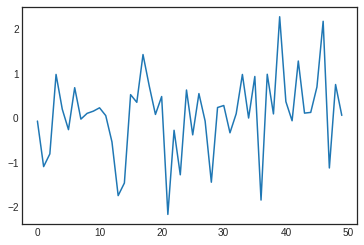

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

x= range(50)
y = tf.random.normal([50], 0, 1)
plt.plot(x, y)
plt.show()

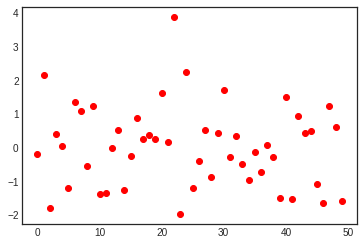

In [ ]:
x= range(50)
y = tf.random.normal([50], 0, 1)
plt.plot(x, y, 'ro')
plt.show()

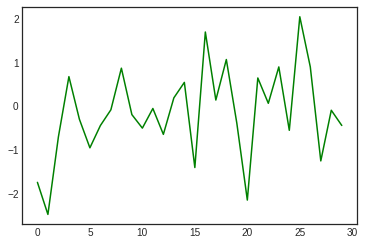

In [ ]:
x= range(30)
y = tf.random.normal([30], 0, 1)
plt.plot(x, y, 'g-')
plt.show()

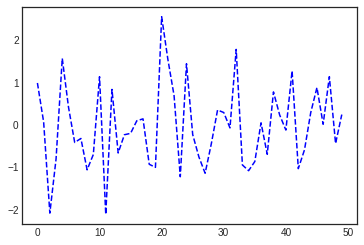

In [ ]:
x= range(50)
y = tf.random.normal([50], 0, 1)
plt.plot(x, y, 'b--')
plt.show()

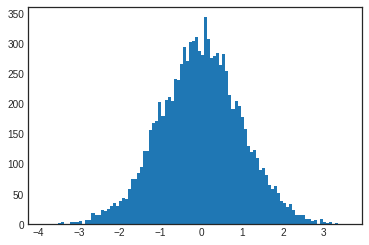

In [ ]:
random_normal = tf.random.normal([10000], 0, 1)
plt.hist(random_normal, bins = 100)
plt.show()

### XOR Gate의 'LOSS' 시각화


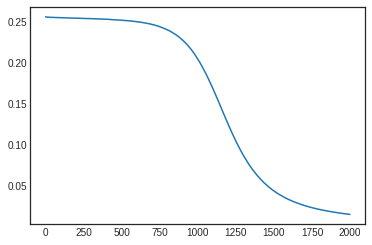

In [ ]:
plt.plot(history.history['loss']); # 위에서 XOR 게이트 한것을 시각화함 로쓰 함수를 시각화 한 것임